# TSP - Heuristics

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

## Create instance

In [2]:
# Random instance
N = 500  # Number of points
np.random.seed(12)
coordinates = np.random.random((N, 2))
D = squareform(pdist(coordinates))

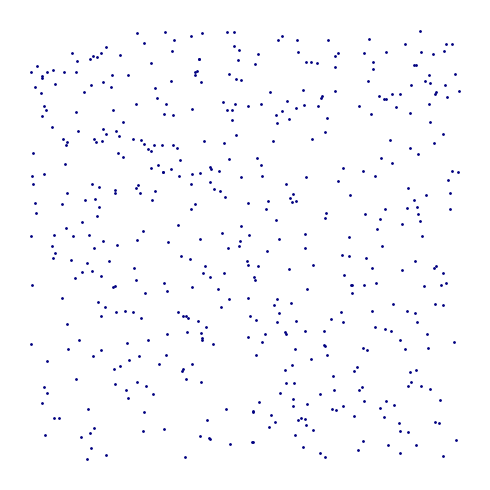

In [3]:
fig, ax = plt.subplots(figsize=[5, 5], dpi=100)

ax.scatter(coordinates[:, 0], coordinates[:, 1], color="navy", s=1)
ax.axis('off')

fig.tight_layout()
plt.show()

## OR-Tools

In [4]:
# Create the routing index manager: number of nodes, number of vehicles, depot node
manager = pywrapcp.RoutingIndexManager(
    N, 1, 0
)

# Create Routing Model
routing = pywrapcp.RoutingModel(manager)

In [5]:
# Same valid for any callback related to arcs/edges
def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return int(D[from_node, to_node] * 1e6)


transit_callback_index = routing.RegisterTransitCallback(distance_callback)

In [6]:
# Define cost of each arc
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

In [7]:
# Setting heuristic strategies
search_parameters = pywrapcp.DefaultRoutingSearchParameters()

# Constructive
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.LOCAL_CHEAPEST_ARC
)

# Local search
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH
)

# Time-limit
search_parameters.time_limit.FromSeconds(120)

# Solve the problem
solution = routing.SolveWithParameters(search_parameters)

In [8]:
print(f"{solution.ObjectiveValue() * 1e-6 :.2f}")

17.58


In [9]:
route_or = []
index = routing.Start(0)
while not routing.IsEnd(index):
    node_index = manager.IndexToNode(index)
    previous_index = index
    index = solution.Value(routing.NextVar(index))
    route_or.append(node_index)
else:
    node_index = manager.IndexToNode(index)
    route_or.append(node_index)

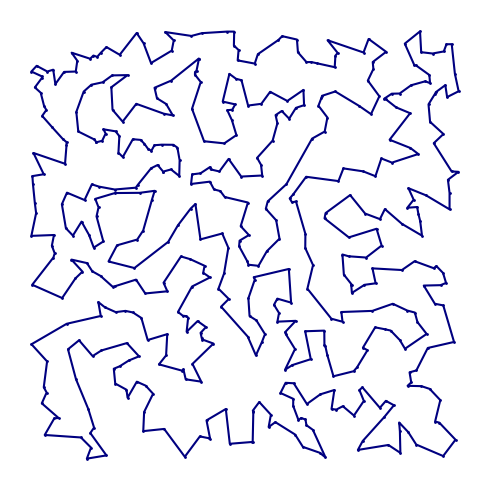

In [10]:
fig, ax = plt.subplots(figsize=[5, 5], dpi=100)

tour = np.array(route_or)
ax.scatter(coordinates[tour, 0], coordinates[tour, 1], color="navy", s=1)
ax.plot(coordinates[tour, 0], coordinates[tour, 1], color="navy")
ax.axis('off')

fig.tight_layout()
plt.show()

## tspgrasp

Consider this a bonus tutorial, as this is a specialized package for the TSP.

In [11]:
from tspgrasp import Grasp

In [12]:
grasp = Grasp(seed=12)
sol_grasp = grasp(D, time_limit=120)
print(f"{sol_grasp.cost :.2f}")

17.08


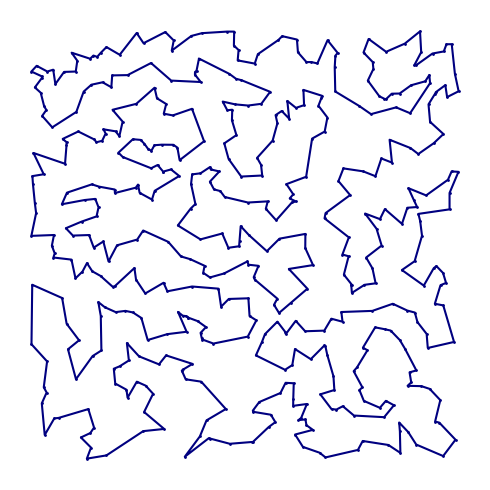

In [13]:
fig, ax = plt.subplots(figsize=[5, 5], dpi=100)

tour = np.array(sol_grasp.tour)
ax.scatter(coordinates[tour, 0], coordinates[tour, 1], color="navy", s=1)
ax.plot(coordinates[tour, 0], coordinates[tour, 1], color="navy")
ax.axis('off')

ax.axis('off')
fig.tight_layout()
plt.show()

In [14]:
print(f"{len(grasp.costs)} Grasp iterations")

576 Grasp iterations
